In [1]:
import gzip
import pickle
from os.path import join, expanduser
import pandas as pd
import numpy as np
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt
import article_analysis.parse_ent as aape
from ast import literal_eval
from os.path import expanduser
import seaborn as sns
import os
import seaborn as sns

%load_ext autoreload
%autoreload 1
%aimport article_analysis.parse
%aimport article_analysis.parse_ent

In [2]:
# nlp = aape.init_nlp()

In [3]:
plt.style.use('seaborn-whitegrid')
df_ = pd.read_csv(expanduser('~/data/jstor/stats/np_stats.csv.gz'), index_col=0)

/Users/belikov/miniconda3/envs/aa/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
df = df_.copy()

In [5]:
df.head()

,np,doi,root,n_words,n_phrases,np_first_occ,root_first_occ,np_count.table,np_count.and_ig_ig,np_count.andnot_and_ig,np_count.andnot_andnot_and
0,"('business',)",10.1525/sop.2004.47.2.189,business,14374,683,0.134615,0.134615,0.0,2.0,0.0,4.0
1,"('table',)",10.1525/sop.2004.47.2.189,table,14374,683,0.165680,0.134615,0.0,2.0,0.0,0.0
2,"('respondent',)",10.1525/sop.2004.47.2.189,respondent,14374,683,0.029586,0.029586,1.0,2.0,2.0,37.0
3,"('majority',)",10.1525/sop.2004.47.2.189,majority,14374,683,0.031065,0.031065,0.0,1.0,0.0,9.0
4,"('man',)",10.1525/sop.2004.47.2.189,man,14374,683,0.062130,0.062130,0.0,1.0,0.0,43.0


In [6]:
dfc = df.groupby('doi').apply(lambda x: all(x['np_count.table'] == 0))

In [7]:
dfc.head()

doi
10.1086/210044    True
10.1086/210138    True
10.1086/210179    True
10.1086/210220    True
10.1086/210316    True
dtype: bool

In [8]:
sum(dfc)/dfc.shape[0]

0.5528626624517036

In [9]:
mask_table = (df['np_count.table'] != 0)
mask_first = (df['np_count.and_ig_ig'] != 0)
mask_second = (df['np_count.andnot_and_ig'] != 0)
masks = [mask_table, mask_first, mask_second]
mask_names = ['t', 'first', 'second']
from itertools import combinations

In [10]:
for ma_, mb_ in combinations(zip(mask_names, masks), 2):
    na, ma = ma_ 
    nb, mb = mb_ 

    print(f'{na} {nb} : {sum(ma & mb)/ma.shape[0]:.3f}')

t first : 0.006
t second : 0.006
first second : 0.021


In [11]:
fname = expanduser('~/data/jstor/latest/corpus_clean_dict.pgz')
with gzip.open(fname) as fp:
    articles_ds = pickle.load(fp)

***
punct     8
n        73
Name: 19, dtype: object
4
***
punct    10
n        73
Name: 10, dtype: object
punct    10
n        74
Name: 90, dtype: object
punct    12
n        74
Name: 106, dtype: object
punct     10
n        100
Name: 307, dtype: object
1
***
11
***
7
***
10
***
10
***
9
***
punct     20
n        119
Name: 199, dtype: object
4
***
9
***
10
***
punct    13
n        42
Name: 12, dtype: object
punct    11
n        50
Name: 35, dtype: object
punct    11
n        70
Name: 644, dtype: object
punct    12
n        77
Name: 9, dtype: object
punct    14
n        67
Name: 7, dtype: object
0
***
punct     8
n        58
Name: 123, dtype: object
punct    10
n        72
Name: 99, dtype: object
punct     9
n        66
Name: 37, dtype: object
punct     9
n        86
Name: 223, dtype: object
punct    14
n        71
Name: 388, dtype: object
0
***
punct    12
n        75
Name: 654, dtype: object
punct    16
n        64
Name: 185, dtype: object
punct    13
n        79
Name: 576, dtype: obj

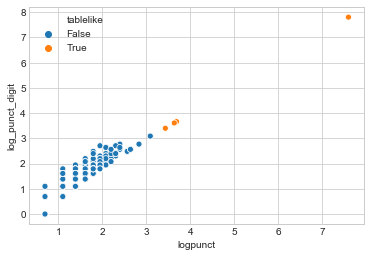

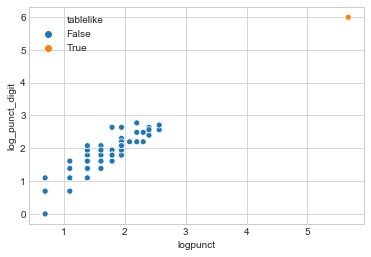

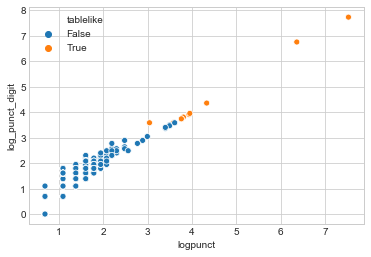

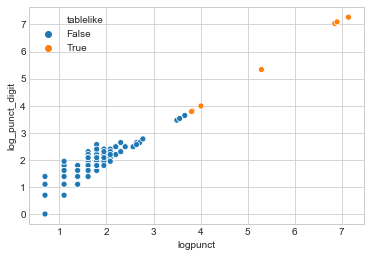

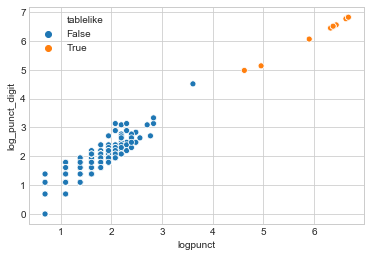

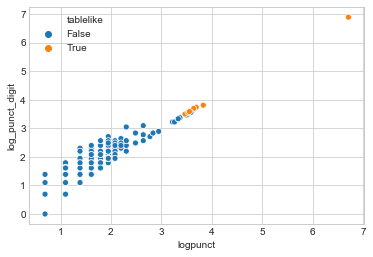

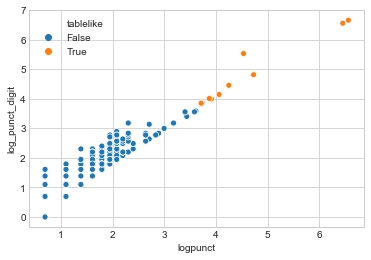

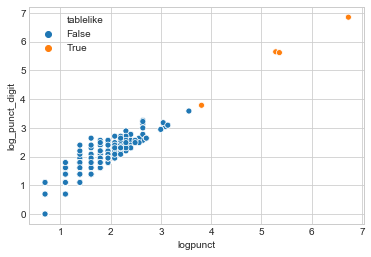

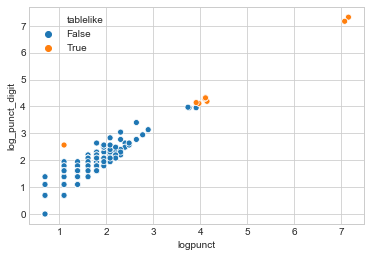

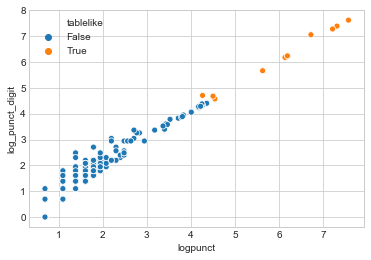

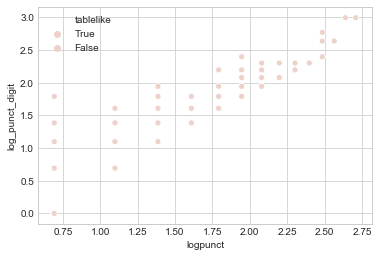

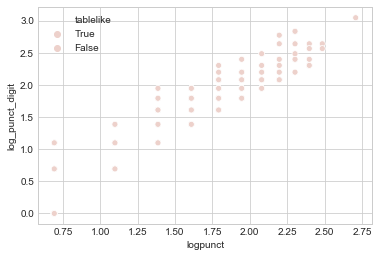

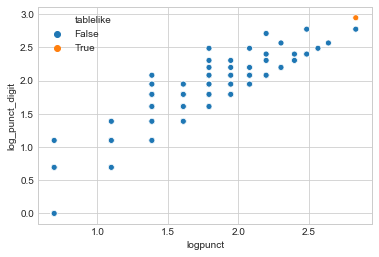

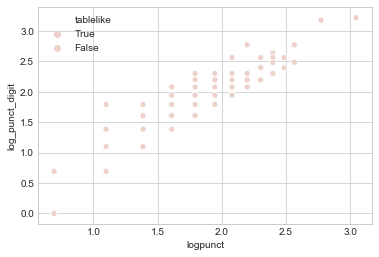

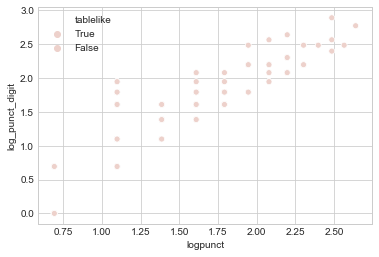

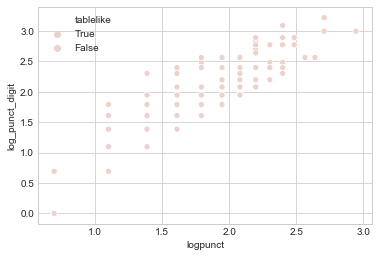

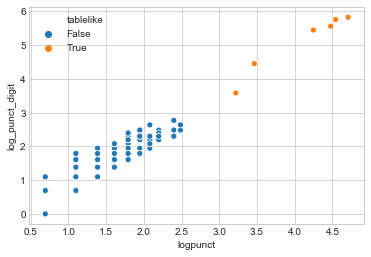

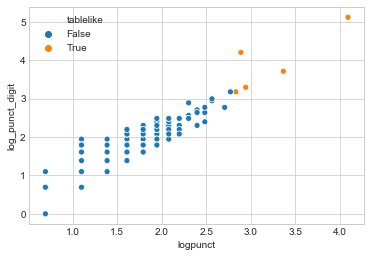

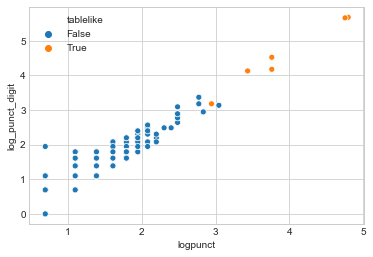

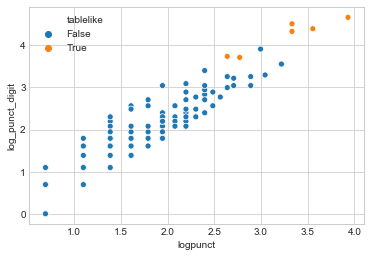

In [140]:
keywords = ['hypothesis', 'hypotheses', 'table']
thr_freq = 0.4
thr_len = 10

for doi, flag in dfc.head(20).iteritems():
    carticle = articles_ds[doi]
    table_phrases = [x for x in carticle if 'table' in x]
    stats = aape.find_tablelike_phrases(carticle, thr_freq=thr_freq, thr_len=thr_len)
    print('***')
    iis_prime = stats.sort_values('rad_rank').tail(5)
    for ii, row in iis_prime.iterrows():
        if not row['tablelike']:
            print(row[['punct', 'n']])
#             print(carticle[ii])
#     iis = stats.loc[stats['tablelike'], 'index'].values
    print(stats['tablelike'].sum())
    fig, ax = plt.subplots()
    sns.scatterplot('logpunct', 'log_punct_digit', data=stats, hue='tablelike', ax=ax)

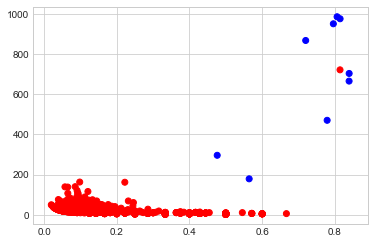

In [94]:
rng = np.random.RandomState(1)
clf = IsolationForest(behaviour='new', max_samples=0.9,
                      random_state=rng, contamination=0.01)

X = stats[['freq_punct', 'n']].values
clf.fit(X)
y_pred = clf.predict(X)
y_pred2 = ['r' if x == 1 else 'b' for x in y_pred]
plt.scatter(X[:, 0], X[:, 1], c=y_pred2)

In [36]:
stats = aape.get_stats_table(carticle)

In [37]:
stats.sort_values(['freq_punct']).tail()

,index,n_digitlike,n,punct,table_flag,freq,freq_punct,logn,table_distance,table_distance_normed,table_flag_ext
432,432,0,24,16,False,0.000000,0.666667,3.178054,10,0.010905,False
487,487,453,2641,2005,True,0.171526,0.759182,7.878913,65,0.070883,True
434,434,0,39,30,False,0.000000,0.769231,3.663562,12,0.013086,False
428,428,0,46,39,False,0.000000,0.847826,3.828641,6,0.006543,False
433,433,0,43,37,False,0.000000,0.860465,3.761200,11,0.011996,False


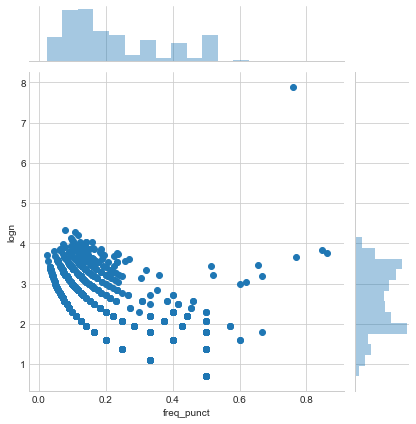

In [38]:
sns.jointplot('freq_punct', 'logn', data=stats)

In [118]:
stats[stats.rad_rank_plain > (stats.shape[0] - 5)]

,index,n_digitlike,n,punct,table_flag,freq,freq_punct,logpunct,logn,rad,rad_rank,rad_rank_plain,table_distance,table_distance_normed,table_flag_ext
119,119,114,950,756,True,0.120000,0.795789,6.629363,6.856462,222.804900,0.997653,850.0,0,0.000000,True
239,239,79,867,624,False,0.091119,0.719723,6.437752,6.765039,211.544338,0.996479,849.0,120,0.140845,False
246,246,123,985,794,False,0.124873,0.806091,6.678342,6.892642,225.909522,1.000000,852.0,127,0.149061,False
278,278,124,975,794,False,0.127179,0.814359,6.678342,6.882437,225.768959,0.998826,851.0,159,0.186620,False
578,578,85,721,587,False,0.117892,0.814147,6.376727,6.580639,205.955398,0.995305,848.0,459,0.538732,False


In [18]:
stats.sort_values(['n', 'freq_punct']).tail()

,index,n_digitlike,n,punct,table_flag,freq,freq_punct,table_distance,table_distance_normed,table_flag_ext
209,209,3,63,6,False,0.047619,0.095238,213,0.232279,False
50,50,3,68,8,False,0.044118,0.117647,372,0.405671,False
19,19,3,73,8,False,0.041096,0.109589,403,0.439477,False
42,42,0,77,6,False,0.000000,0.077922,380,0.414395,False
487,487,453,2641,2005,True,0.171526,0.759182,65,0.070883,True


In [26]:
ii, df = aape.find_tablelike_phrases(carticle, thr_freq=thr_freq, thr_len=thr_len)

In [27]:
df.head()

,index,n_digitlike,n,punct,table_flag,freq,freq_punct,table_distance,table_distance_normed,table_flag_ext
0,0,0,20,2,False,0.000000,0.100000,422,0.460196,False
1,1,1,25,3,False,0.040000,0.120000,421,0.459106,False
2,2,0,37,5,False,0.000000,0.135135,420,0.458015,False
3,3,1,34,6,False,0.029412,0.176471,419,0.456925,False
4,4,0,34,3,False,0.000000,0.088235,418,0.455834,False


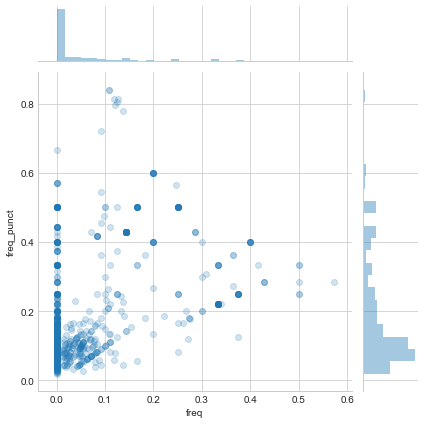

In [33]:
sns.jointplot('freq', 'freq_punct', df, alpha=0.2)